In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\supev\AppData\Local\Temp\ipykernel_2556\1261316105.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'], kde=False, bins=40)


<Axes: xlabel='total_bill'>

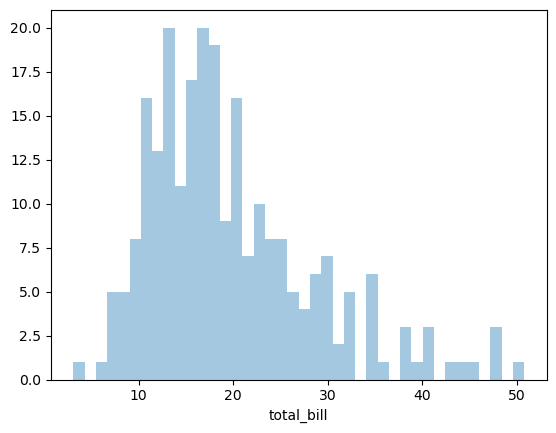

In [8]:
sns.distplot(tips['total_bill'], kde=False, bins=40)

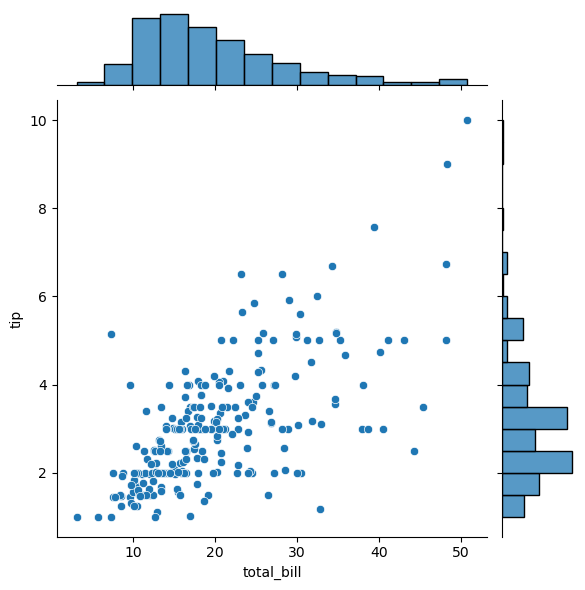

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips)
#  kind='kde', 'hex', 'reg'

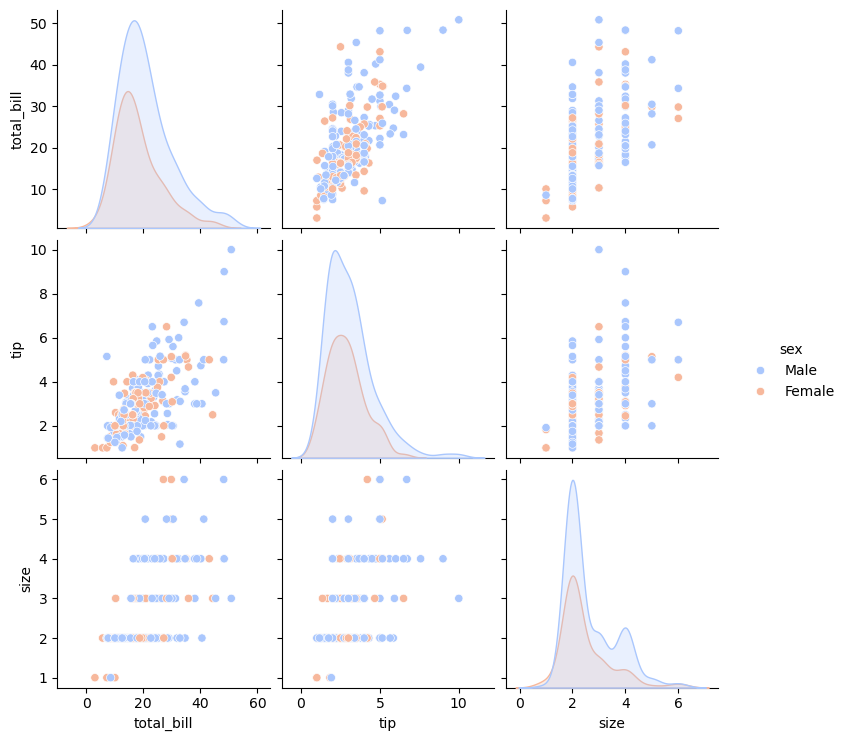

In [10]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

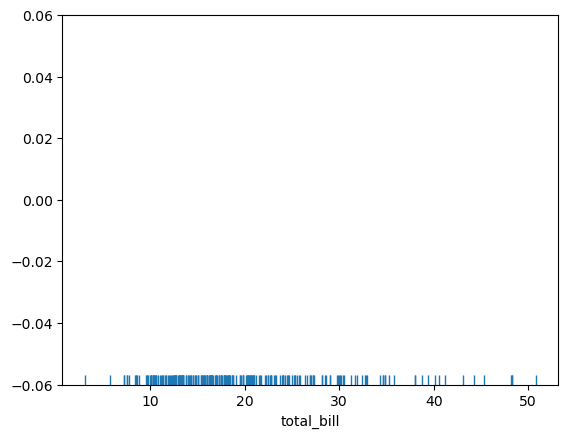

In [11]:
sns.rugplot(tips['total_bill'])

(0.0, 1.0)

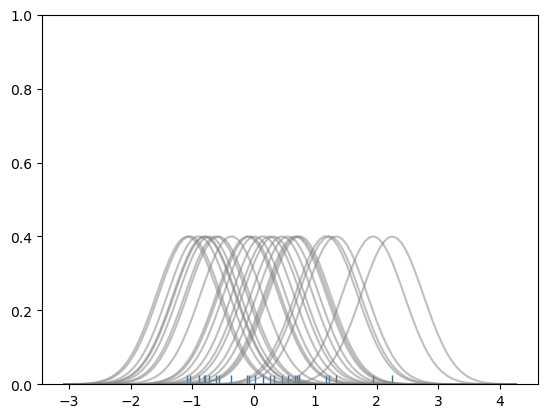

In [12]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

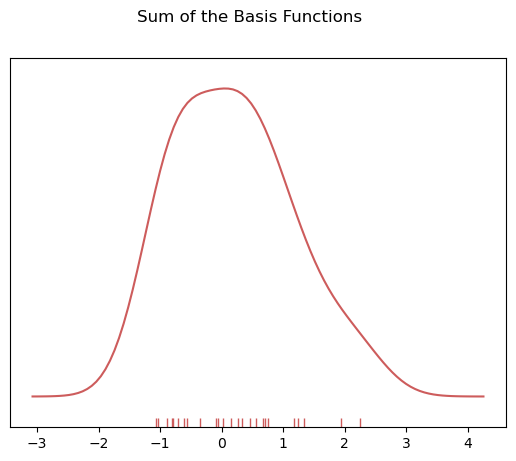

In [13]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

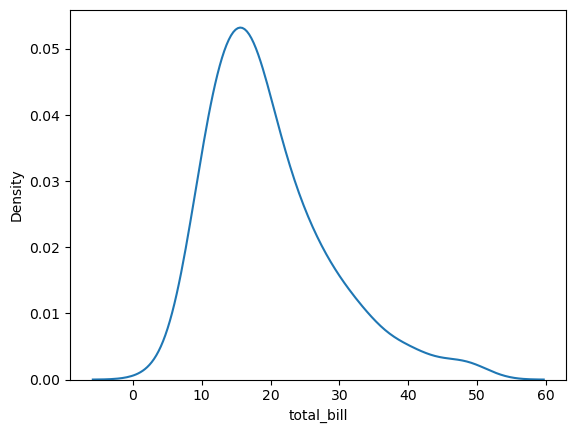

In [14]:
sns.kdeplot(tips['total_bill'])

## CAtegorical Plots

In [32]:
import numpy as np
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

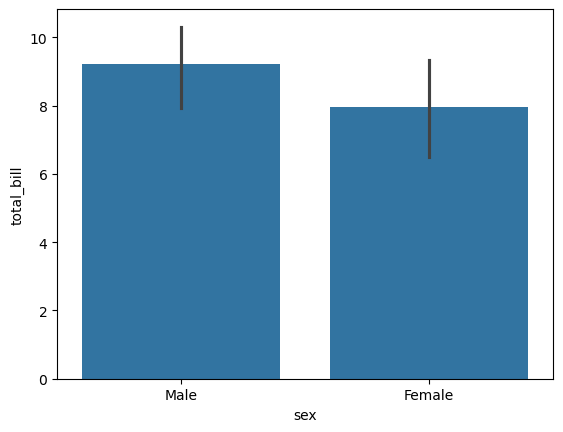

In [40]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

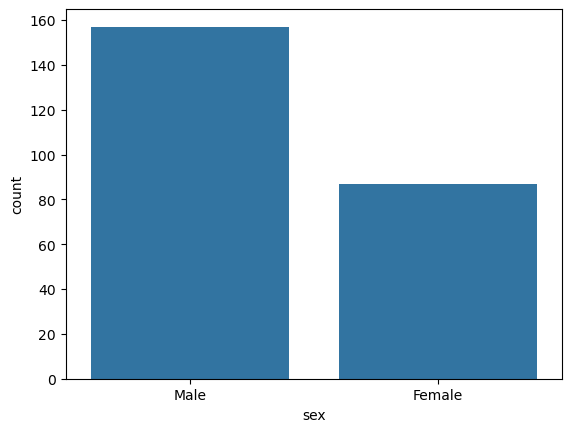

In [44]:
sns.countplot(x='sex', data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

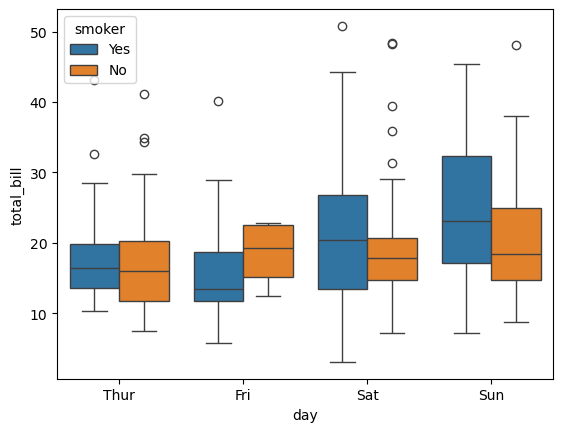

In [66]:
sns.boxplot(x='day', y='total_bill',data=tips, hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

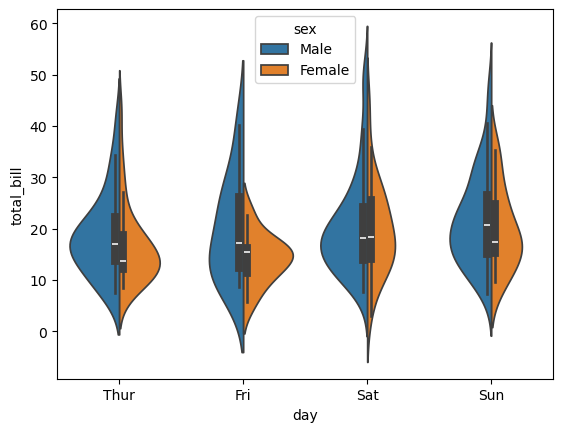

In [72]:
sns.violinplot(x='day', y='total_bill',data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

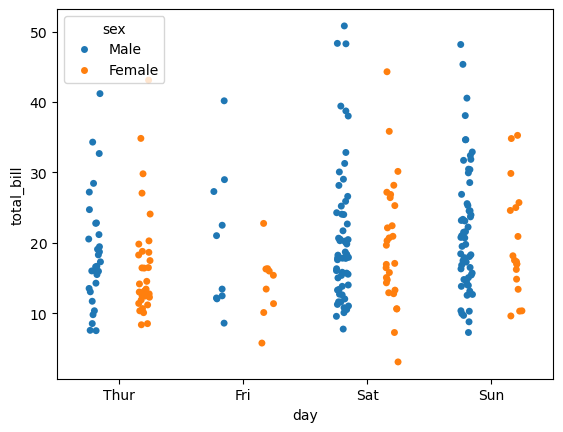

In [114]:
sns.stripplot(x='day', y='total_bill',data=tips, jitter=True, hue='sex', dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

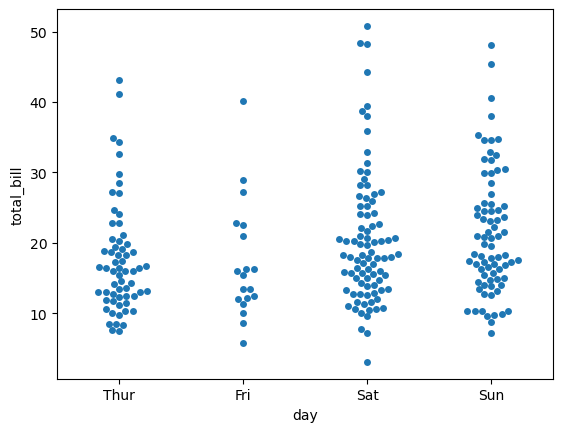

In [116]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

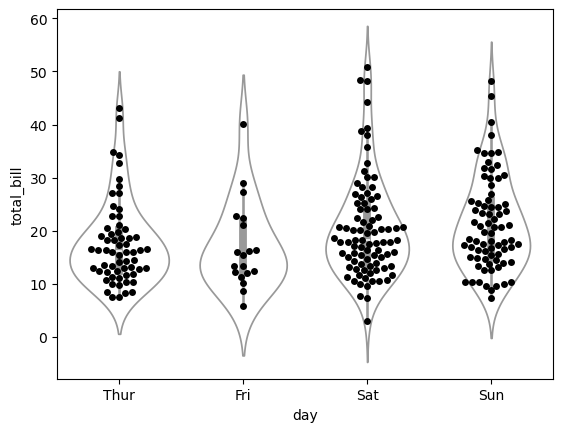

In [118]:
sns.violinplot(x='day',y='total_bill',data=tips, color='white')
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

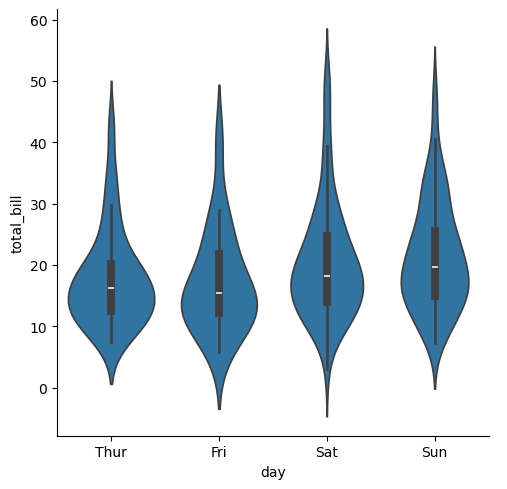

In [125]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

In [129]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [133]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [151]:
tc = tips.corr(numeric_only=True)

In [153]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

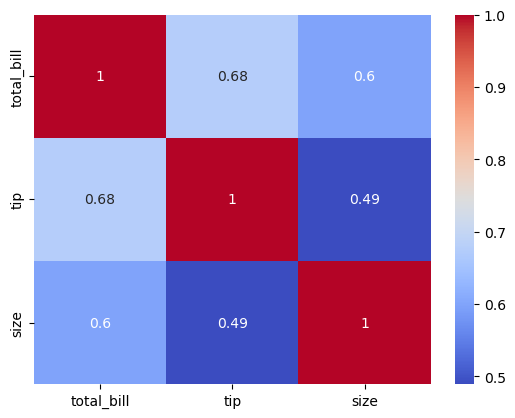

In [159]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [171]:
fp = flights.pivot_table(index='month', columns='year', values='passengers', observed=False)

<Axes: xlabel='year', ylabel='month'>

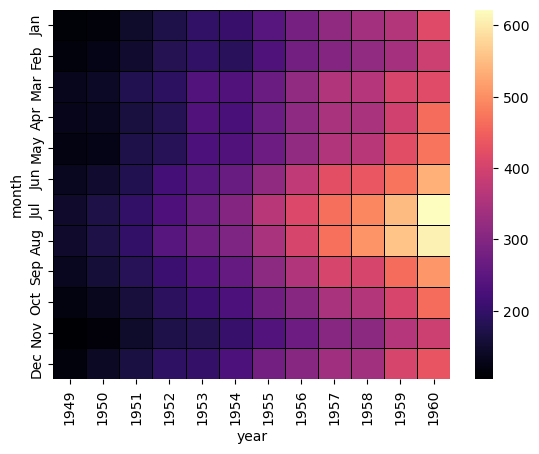

In [191]:
sns.heatmap(fp, cmap='magma', linecolor="black", linewidth=0.5)

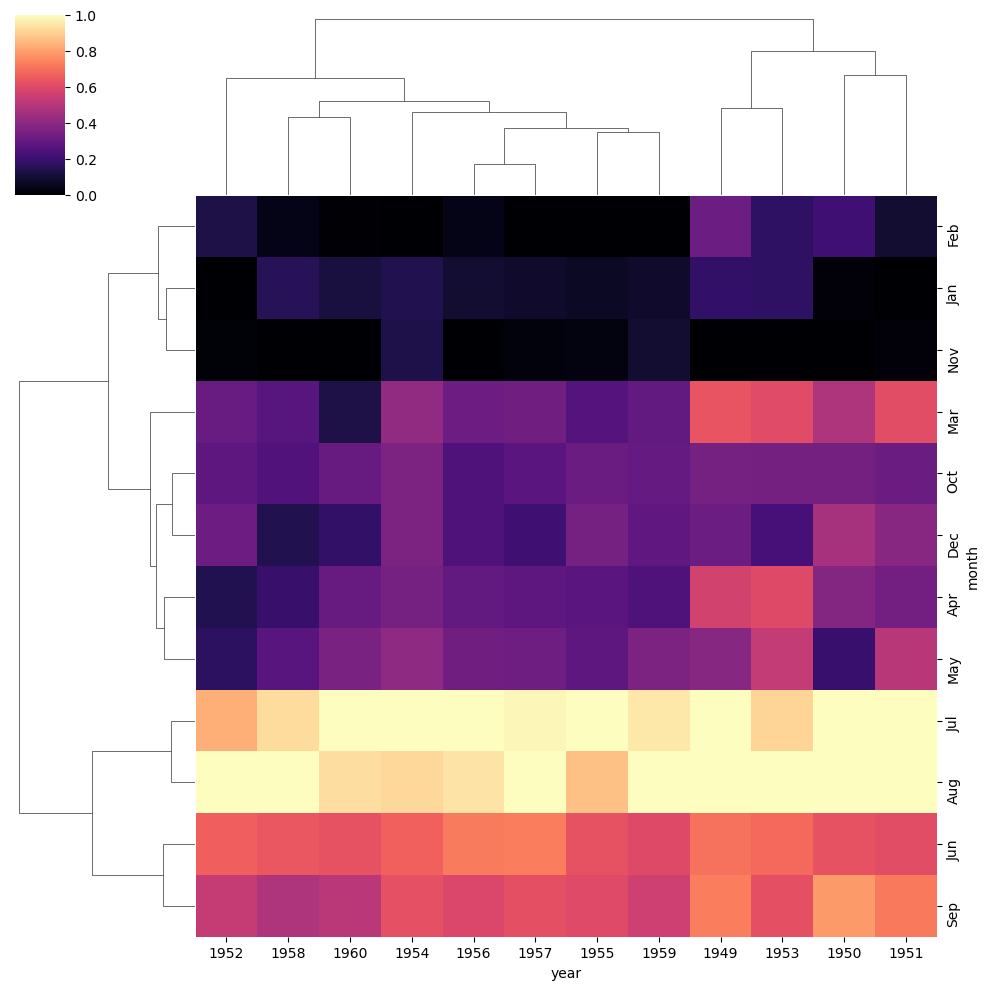

In [203]:
sns.clustermap(fp, cmap='magma',standard_scale=1)